In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.style as sty
import numpy as np
from scipy import stats
import warnings
sty.use('ggplot')
warnings.filterwarnings('ignore')


csv_file = "oasis_longitudinal.csv"
mri_data = pd.read_csv(csv_file)
mri_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
mri_data['Group'] = mri_data['Group'].replace(['Converted'],['Demented'])
mri_data.head()
#mri_data.loc[mri_data['Group'] == 'Converted']
mri_data.count()

Subject ID    373
MRI ID        373
Group         373
Visit         373
MR Delay      373
M/F           373
Hand          373
Age           373
EDUC          373
SES           354
MMSE          371
CDR           373
eTIV          373
nWBV          373
ASF           373
dtype: int64

In [4]:
mri_dropna = mri_data.dropna(how = 'any')
mri_dropna.count()


Subject ID    354
MRI ID        354
Group         354
Visit         354
MR Delay      354
M/F           354
Hand          354
Age           354
EDUC          354
SES           354
MMSE          354
CDR           354
eTIV          354
nWBV          354
ASF           354
dtype: int64

In [5]:
mri_dropdups_first = mri_dropna.drop_duplicates(['Subject ID'], keep = 'first')
mri_dropdups_first.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [6]:
#mri_dropdups_first.describe()

In [7]:
# mri_grouped_data = mri_data.set_index(['Subject ID','MRI ID'])
# mri_grouped_data.head(10)
mri_dropdups_last = mri_dropna.drop_duplicates(['Subject ID'], keep = 'last')
mri_dropdups_last.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
16,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186


In [8]:
gender_based = mri_dropdups_last.groupby(['M/F']).count()['Subject ID']
gender_based

M/F
F    84
M    58
Name: Subject ID, dtype: int64

<BarContainer object of 2 artists>

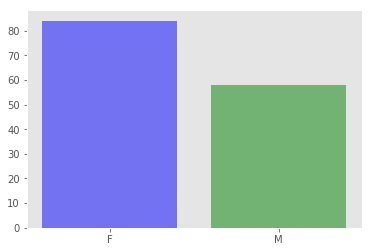

In [9]:
x_axis = gender_based.index
plt.grid()
plt.bar(x_axis, gender_based, alpha=0.5, align="center", color = ['b','g'])

In [10]:
group_based = mri_dropdups_last.groupby(['Group']).count()['Subject ID']
group_based

Group
Demented       70
Nondemented    72
Name: Subject ID, dtype: int64

<BarContainer object of 2 artists>

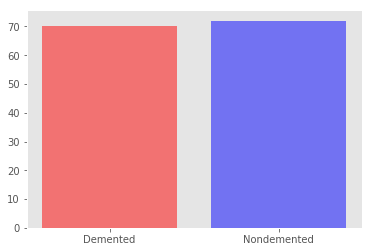

In [11]:
x_axis = group_based.index
plt.grid()
plt.bar(x_axis, group_based, alpha=0.5, align="center", color = ['r','b'])

In [12]:
bins = [60,66,71,76,81,86,91,100]
age_cat = ['60-65','66-70','71-75','76-80','81-85','86-90','91+']

In [13]:
mri_dropdups_last['Age Category'] = pd.cut(mri_dropdups_last['Age'],bins = bins, labels = age_cat, include_lowest = True)
mri_dropdups_last.set_index(['Age Category']).head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Age Category,,,,,,,,,,,,,,,
86-90,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
86-90,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
81-85,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
91+,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
66-70,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186


In [14]:
mmse_gender = mri_dropdups_last[['MMSE','M/F']].groupby('M/F')
mmse_gender.median()

,MMSE
M/F,
F,29.0
M,28.0


M/F
F    24.529412
M    24.416667
Name: MMSE, dtype: float64

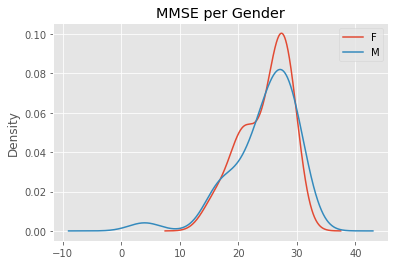

In [15]:
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['MMSE'].plot.kde()
plt.legend()
plt.title('MMSE per Gender')
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['MMSE'].mean()



F         AxesSubplot(0.1,0.15;0.363636x0.75)
M    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

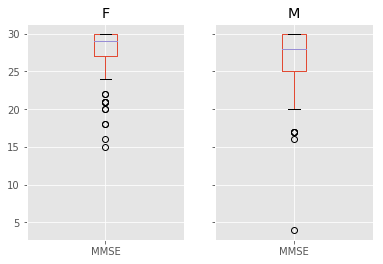

In [16]:
mmse_gender.boxplot()
# mmse_gender_box = mmse_gender.boxplot(figsize=(8,6))
# # plt.tight_layout()
# # plt.subplots_adjust(top=0.88)
# # plt.ylabel('MMSE Score')
# # plt.ylim(14,32)
# # plt.suptitle('Distribution of MMSE Score by Gender',x=0.52,size=16)
# mmse_gender_box.median()


In [17]:
cdr_gender = mri_dropdups_last[['CDR','M/F']].groupby('M/F')
cdr_gender.head()

,CDR,M/F
1,0.0,M
6,0.0,F
9,0.0,M
14,0.0,F
16,0.5,M
18,0.5,F
21,0.0,F
24,0.0,F
26,1.0,M
28,0.5,M


In [18]:
cdr_gender.median()

,CDR
M/F,
F,0.0
M,0.5


M/F
F    0.691176
M    0.666667
Name: CDR, dtype: float64

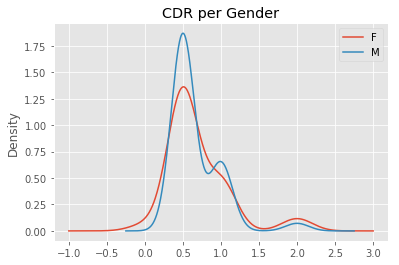

In [19]:
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['CDR'].plot.kde()
plt.legend()
plt.title('CDR per Gender')
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['CDR'].mean()


M/F
F    1401.5
M    1553.0
Name: eTIV, dtype: float64

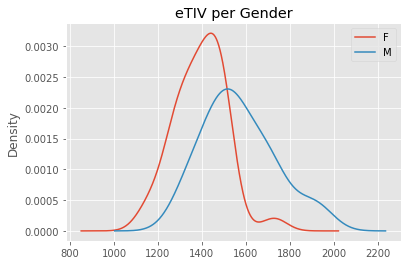

In [63]:
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['eTIV'].plot.kde()
plt.legend()
plt.title('eTIV per Gender')
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['eTIV'].median()


M/F
F    0.708
M    0.696
Name: nWBV, dtype: float64

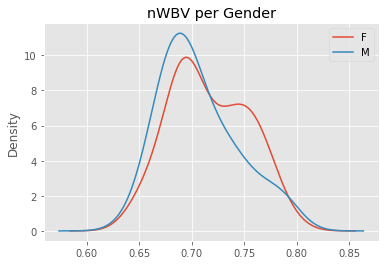

In [64]:
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['nWBV'].plot.kde()
plt.legend()
plt.title('nWBV per Gender')
mri_dropdups_last.loc[mri_dropdups_last['Group'] == 'Demented'].groupby('M/F')['nWBV'].median()


F         AxesSubplot(0.1,0.15;0.363636x0.75)
M    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

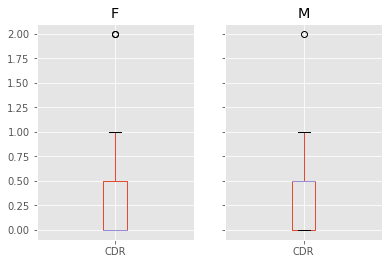

In [39]:
cdr_gender.boxplot()

In [40]:
age_based = mri_dropdups_last.groupby(['Age Category']).count()['Subject ID']
age_based.sum()

142

<BarContainer object of 7 artists>

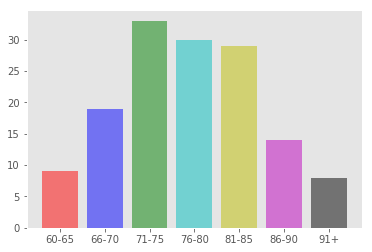

In [41]:
x_axis = age_based.index
plt.grid()
plt.bar(x_axis, age_based, alpha=0.5, align="center", color = ['r','b','g','c','y','m','k'])

In [42]:
mri_age_group = mri_dropdups_last.groupby(['Age Category','Group']).count()['Subject ID'].unstack()
mri_age_group

Group,Demented,Nondemented
Age Category,,
60-65,3,6
66-70,12,7
71-75,18,15
76-80,14,16
81-85,13,16
86-90,7,7
91+,3,5


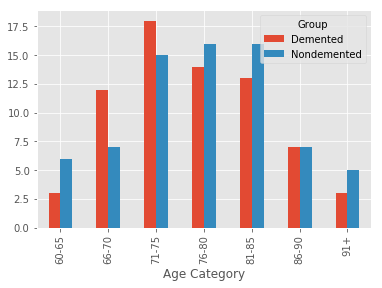

In [43]:

mri_age_group.plot(kind = 'bar', stacked = False, grid = True)

In [44]:
cdr_gender = mri_dropdups_last.groupby(['CDR','M/F']).count()['Subject ID'].unstack()

cdr_gender.dropna(how = 'any')

M/F,F,M
CDR,,
0.0,51,22
0.5,23,26
1.0,8,9
2.0,2,1


In [45]:
# CDR Vs Gender to show Men have higher chance of Dementia
# x_axis = cdr_group.index
female = cdr_gender['F'].median()
male = cdr_gender['M'].median()

# cdr_gender.boxplot()
# f_line, = plt.plot(x_axis, female, color="red", label="Female")
# m_line, = plt.plot(x_axis, male, color="blue", label="Male")


In [46]:
cdr_group = mri_dropdups_last.groupby(['CDR','Group']).count()['Subject ID'].unstack()
cdr_group.fillna(0)



Group,Demented,Nondemented
CDR,,
0.0,1.0,72.0
0.5,49.0,0.0
1.0,17.0,0.0
2.0,3.0,0.0


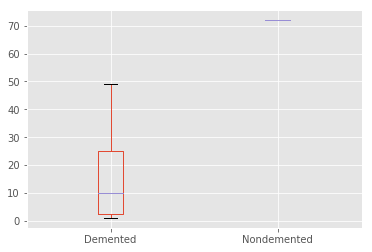

In [47]:
cdr_group.boxplot()

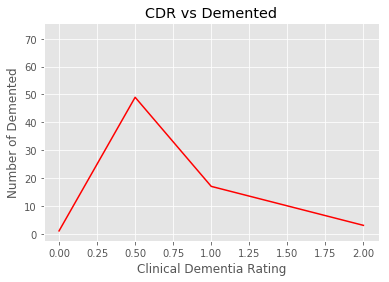

In [48]:
x_axis = cdr_group.index
demented = cdr_group['Demented']
nondemented = cdr_group['Nondemented']

demented_line, = plt.plot(x_axis, demented, color="red", label="Demented")
nondemented_line, = plt.plot(x_axis, nondemented, color="blue", label="Nondemented")
plt.title("CDR vs Demented")
plt.xlabel("Clinical Dementia Rating")
plt.ylabel("Number of Demented")

plt.show()

In [49]:
#MMSE Vs Group to identify signs of Dementia, NonDemented have higher scores
MMSE_based = mri_dropdups_last.groupby(['MMSE','Group']).count()['Subject ID'].unstack()
MMSE_based.fillna(0)

Group,Demented,Nondemented
MMSE,,
4.0,1.0,0.0
15.0,1.0,0.0
16.0,2.0,0.0
17.0,4.0,0.0
18.0,2.0,0.0
20.0,3.0,0.0
21.0,5.0,0.0
22.0,4.0,0.0
23.0,2.0,0.0


In [50]:
EDU_based = mri_dropdups_last[['Group','EDUC']].groupby('Group')
EDU_based.head()


,Group,EDUC
1,Nondemented,14
6,Nondemented,18
9,Nondemented,12
14,Nondemented,14
16,Demented,12
18,Demented,12
21,Nondemented,16
26,Demented,16
28,Demented,8
35,Demented,14


Demented            AxesSubplot(0.1,0.15;0.363636x0.75)
Nondemented    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

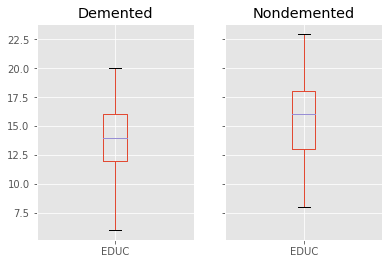

In [51]:
EDU_based.boxplot()

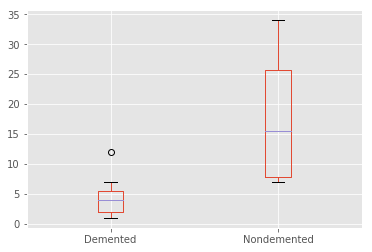

In [52]:
MMSE_based.boxplot()

In [53]:
# merged = mri_dropdups_first[['Subject ID','Group','Age','MMSE','CDR','eTIV','nWBV']].merge(mri_dropdups_last[['Subject ID',
#                             'Group','Age','MMSE','CDR','eTIV','nWBV']], 
#                             on = 'Subject ID', how = 'left',suffixes=('_first', '_last'))
                            
# merged.head()

df1 = mri_dropdups_first[['Subject ID','Age','MMSE']]
df1.head()
                            

,Subject ID,Age,MMSE
0,OAS2_0001,87,27.0
5,OAS2_0004,88,28.0
7,OAS2_0005,80,28.0
13,OAS2_0008,93,30.0
15,OAS2_0009,68,27.0


In [54]:
#The MMSE ranges were 30 for no, 
#26-29 for questionable, 21-25 for mild, 
#11-20 for moderate, and 0-10 for severe dementia. 
# bins1 = [0,10,20,25,29,30]
# category = ['0-10','11-20','21-25','26-29','30+']



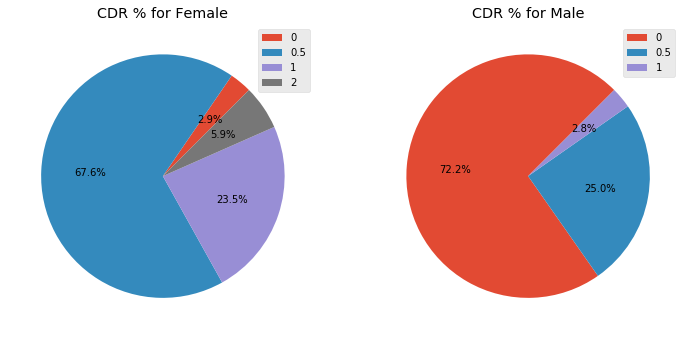

In [58]:
labels=[0,0.5,1,2]
fig,(ax1,ax2) = plt.subplots(1,2,subplot_kw={'aspect':'equal'},figsize=(12,12))
cdr_female = mri_dropdups_last.loc[mri_dropdups_last['M/F'] == 'F'].loc[mri_dropdups_last['Group'] == 'Demented'].groupby(['CDR']).count()['Subject ID']
cdr_male = mri_dropdups_last.loc[mri_dropdups_last['M/F'] == 'M'].loc[mri_dropdups_last['Group'] == 'Demented'].groupby(['CDR']).count()['Subject ID']

ax1.pie(cdr_female,startangle=45, autopct="%1.1f%%")
ax1.set_title('CDR % for Female')
ax1.legend(labels=labels,loc='best')

ax2.pie(cdr_male,startangle=45, autopct="%1.1f%%")
ax2.set_title('CDR % for Male')
ax2.legend(labels=labels,loc='best')

# plt.savefig('cdr_pie.png')
